# Daily Update Data Agregat Covid-19 Jakarta

## __Introduction__

#### __1.1 Problem Statment__
Coronavirus 2019 (Covid-19) is an infectious disease caused by acute respiratory syndrome coronavirus 2 (Sars-CoV-2). This disease was first discovered in December 2019 in Wuhan, the capital of China's Hubei Province, and has since spread globally throughout the world. This extreme increase in Covid-19 caused the World Health Organization (WHO) to declare this Covid-19 outbreak an International Public Health Emergency (PHEIC).

#### __1.2 What to do__
Analyzing recovery performance in Jakarta

#### __1.3 Goal__
Do explore and visualize recovery Jakarta.

#### __1.4 Value__
The accumulation of Covid-19 data has caused an increase in public anxiety about this disease. Therefore, the authors are interested in analyzing and visualizing the data that has been collected so that the public can understand it.

#### __1.5 Dataset__
The dataset used is a dataset taken from the  [Jakarta Covid Data](https://tiny.cc/Datacovidjakarta/) . This dataset takes data from March 16, 2021, to March 16, 2022.

This dataset contains 14 columns and 746 rows.

## __Preparation__

At this step I will import all the dependencies to work on this project.

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#### __2.1 Import Dataset__

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/Portofolio/Data/Daily Update Data Agregat Covid-19 Jakarta.xlsx')

In [5]:
df.shape

(746, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Tanggal          746 non-null    datetime64[ns]
 1   Jam              0 non-null      float64       
 2   Tanggal Jam      0 non-null      float64       
 3   Meninggal        746 non-null    int64         
 4   Sembuh           746 non-null    int64         
 5   Self Isolation   746 non-null    int64         
 6   Masih Perawatan  746 non-null    int64         
 7   Total Pasien     746 non-null    int64         
 8   Positif Harian   746 non-null    int64         
 9   Positif Aktif    746 non-null    int64         
 10  Sembuh Harian    746 non-null    int64         
 11  Tanpa Gejala     606 non-null    float64       
 12  Bergejala        606 non-null    float64       
 13  Belum Ada Data   606 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(8)

In [7]:
df.head()

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,2020-03-01,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2020-03-02,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2020-03-03,NaN,NaN,1,0,0,2,3,3,2,0,NaN,NaN,NaN
3,2020-03-04,NaN,NaN,1,0,0,2,3,0,2,0,NaN,NaN,NaN
4,2020-03-05,NaN,NaN,3,0,0,4,7,4,4,0,NaN,NaN,NaN


In [8]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [9]:
report(df)

,Column,d_type,unique_sample,n_uniques
0,Tanggal,datetime64[ns],"[2020-03-01T00:00:00.000000000, 2020-03-02T00:...",746
1,Jam,float64,[nan],0
2,Tanggal Jam,float64,[nan],0
3,Meninggal,int64,"[0, 1, 3, 5, 7]",663
4,Sembuh,int64,"[0, 12, 13, 17, 21]",723
5,Self Isolation,int64,"[0, 7, 27, 42, 57]",703
6,Masih Perawatan,int64,"[0, 2, 4, 31, 33]",695
7,Total Pasien,int64,"[0, 3, 7, 34, 36]",740
8,Positif Harian,int64,"[0, 3, 4, 27, 2]",598
9,Positif Aktif,int64,"[0, 2, 4, 31, 33]",726


I am going to use report function to make a Dataframe that summarized information from each column such as data type, unique sample and length of unique value.

#### __2.2 Transform The Dataset__
It can be seen that there are columns that have no values in the 'Jam' and 'Jam Tanggal' columns and added the 'Tahun' and 'Bulan' columns. We will delete the column and use data from the past year.

In [10]:
# Memfilter data yang akan digunakan 1 tahun terakhir
df = df[(df['Tanggal'] >= pd.to_datetime('2021-03-16')) & (df['Tanggal'] <=pd.to_datetime('2022-03-16'))].reset_index()

# Menghapus kolom 'Jam', 'Tanggal Jam' dan 'index'
df.drop(df[['Jam', 'Tanggal Jam', 'index']], axis=1, inplace=True)


In [11]:
# Menambahkan kolom 'Tahun' dan 'Bulan'
df['Tahun'] = df['Tanggal'].dt.year
df['Bulan'] = df['Tanggal'].dt.month
df = df.reindex(['Tanggal', 'Tahun', 'Bulan', 'Meninggal', 'Sembuh', 'Self Isolation', 'Masih Perawatan', 'Total Pasien',
            'Positif Harian', 'Positif Aktif', 'Sembuh Harian', 'Tanpa Gejala', 'Bergejala', 'Belum Ada Data'], axis=1)
df.head()

,Tanggal,Tahun,Bulan,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,2021-03-16,2021,3,6062,350561,2996,2751,362370,835,5747,1559,832.0,3301.0,1614.0
1,2021-03-17,2021,3,6077,351680,2907,3036,363700,1330,5943,1119,573.0,2972.0,2398.0
2,2021-03-18,2021,3,6100,352827,3273,3219,365419,1719,6492,1147,246.0,2705.0,3541.0
3,2021-03-19,2021,3,6120,354036,3483,3368,367007,1588,6851,1209,1150.0,4749.0,952.0
4,2021-03-20,2021,3,6143,355221,3894,3686,368944,1937,7580,1185,831.0,4635.0,2114.0


## __Exploratory Data Analysis__

#### __3.1 Statistika Deskriptif__

In [12]:
df.describe()

,Tahun,Bulan,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
count,366.000000,366.000000,366.000000,3.660000e+02,366.000000,366.000000,3.660000e+02,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2021.204918,6.516393,11387.215847,7.183784e+05,13763.830601,5087.199454,7.486167e+05,2352.592896,18851.030055,2296.595628,2036.546448,4757.792350,12056.691257
std,0.404194,3.452774,3056.767055,2.328758e+05,21580.901629,6620.687573,2.379348e+05,3534.745346,27656.738078,3890.142664,5379.245108,10072.038821,20105.726784
min,2021.000000,1.000000,6062.000000,3.505610e+05,103.000000,107.000000,3.623700e+05,14.000000,217.000000,20.000000,0.000000,0.000000,0.000000
25%,2021.000000,4.000000,7641.750000,4.257365e+05,1200.000000,390.000000,4.528890e+05,144.500000,1645.500000,155.750000,0.000000,1.250000,748.500000
50%,2021.000000,7.000000,13450.000000,8.384930e+05,3548.000000,3223.500000,8.552715e+05,756.000000,7106.500000,651.000000,62.000000,80.000000,2027.000000
75%,2021.000000,9.750000,13583.000000,8.506420e+05,12144.500000,5531.750000,8.644432e+05,2685.250000,19207.000000,2216.500000,1264.250000,4994.750000,12523.000000
max,2022.000000,12.000000,15031.000000,1.189556e+06,88295.000000,30418.000000,1.222584e+06,15825.000000,113138.000000,20570.000000,35311.000000,60476.000000,88873.000000


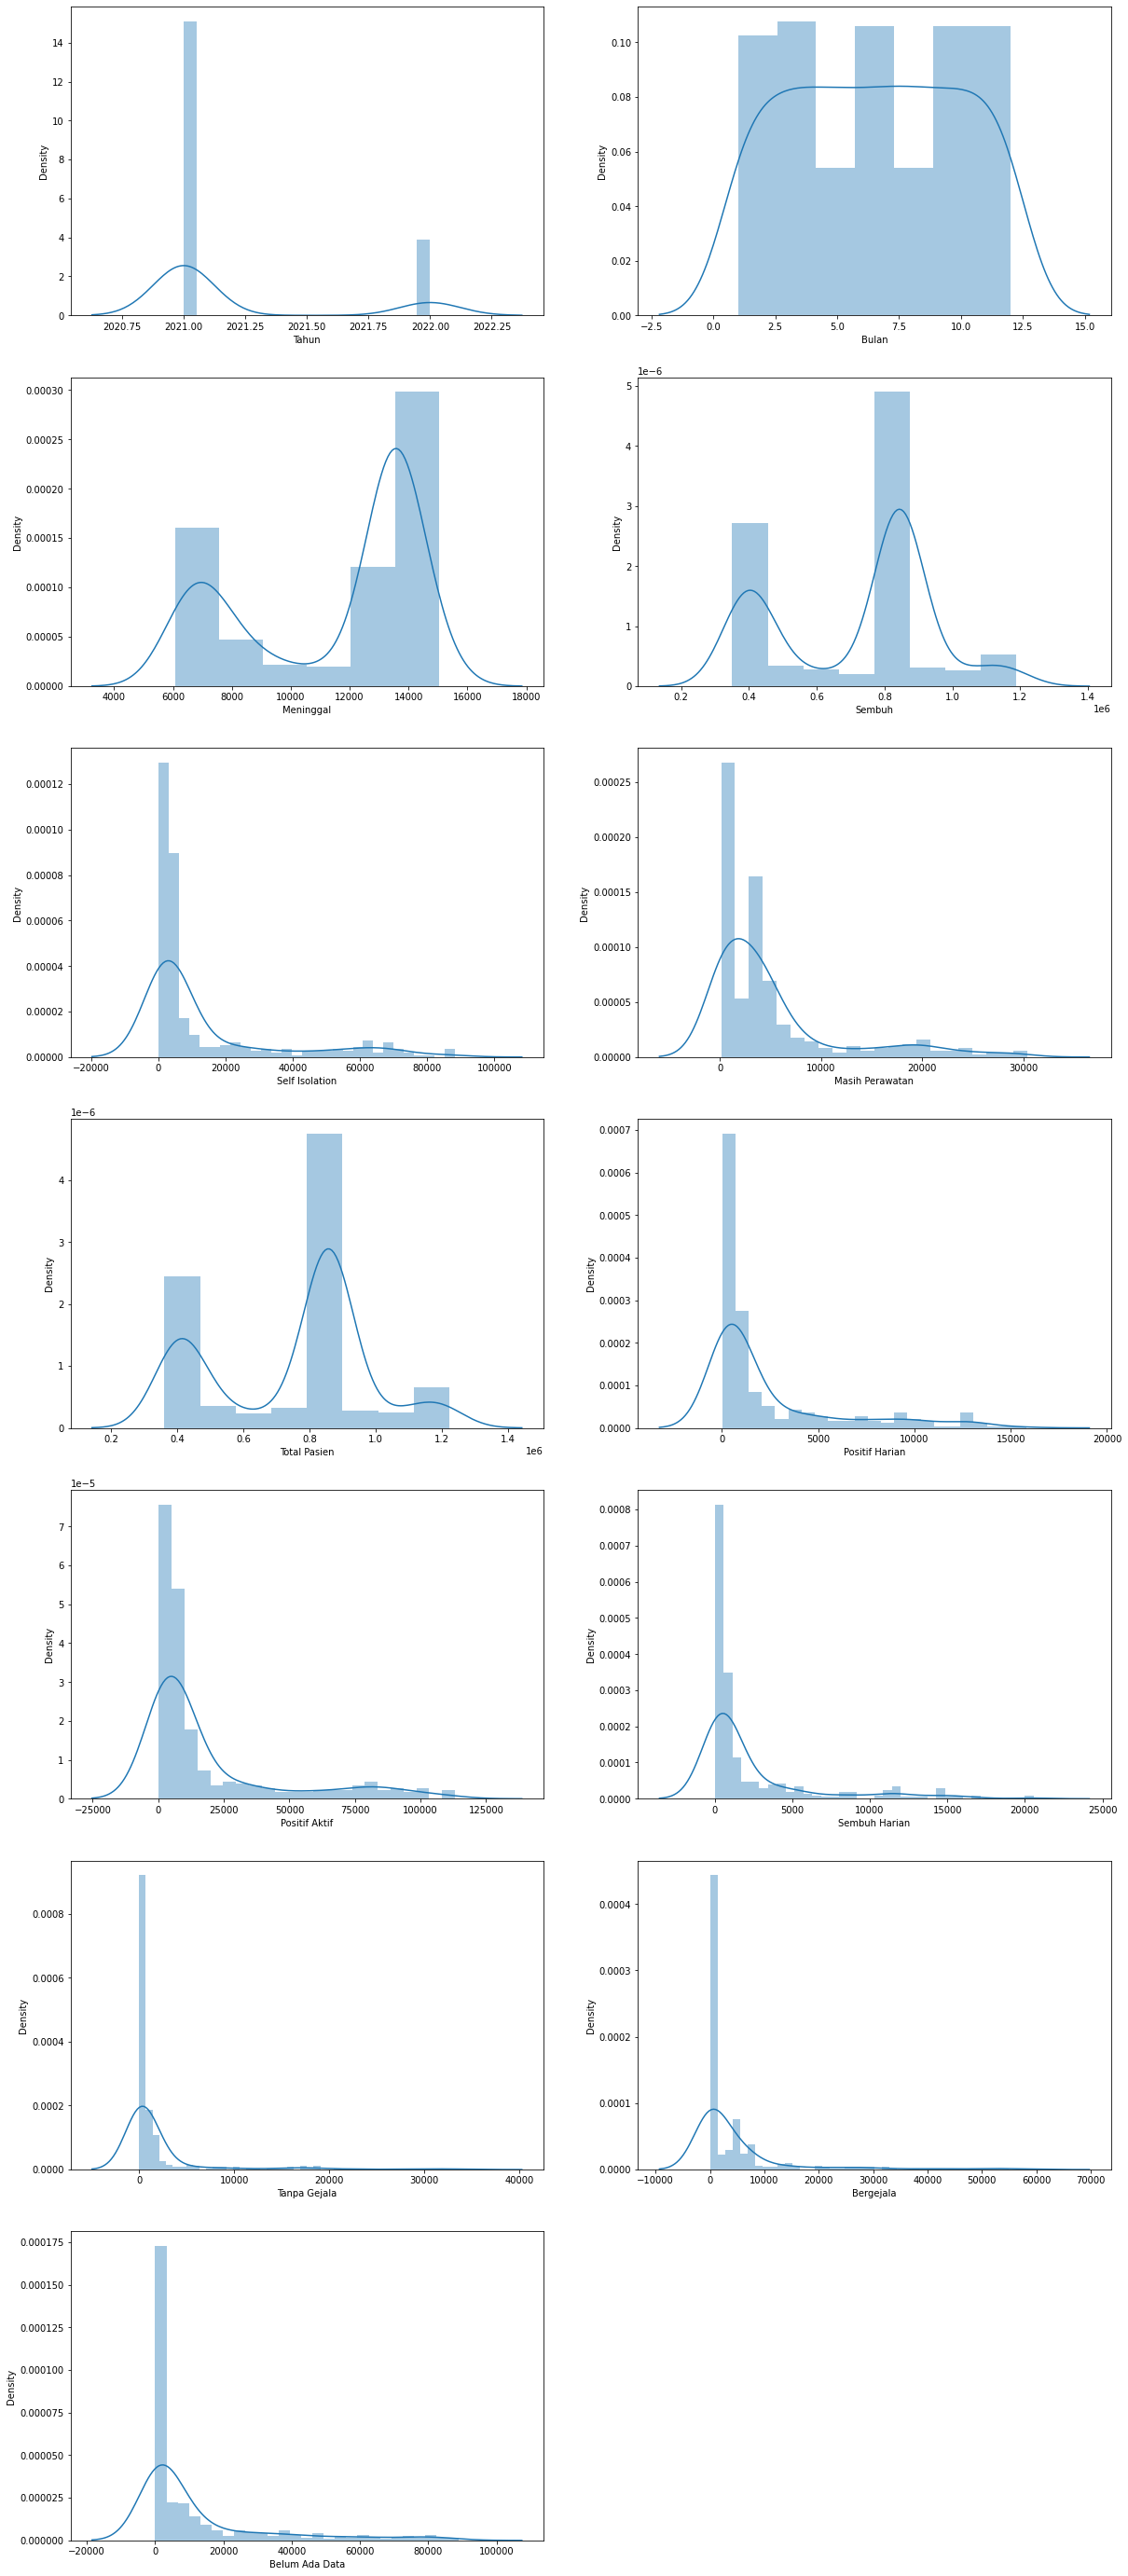

In [13]:
# Distribusi Data
plt.figure(figsize=(20,50))

for i in enumerate(df.describe().columns):
  plt.subplot(7, 2, i[0]+1)
  sns.distplot(df[i[1]])
plt.show()

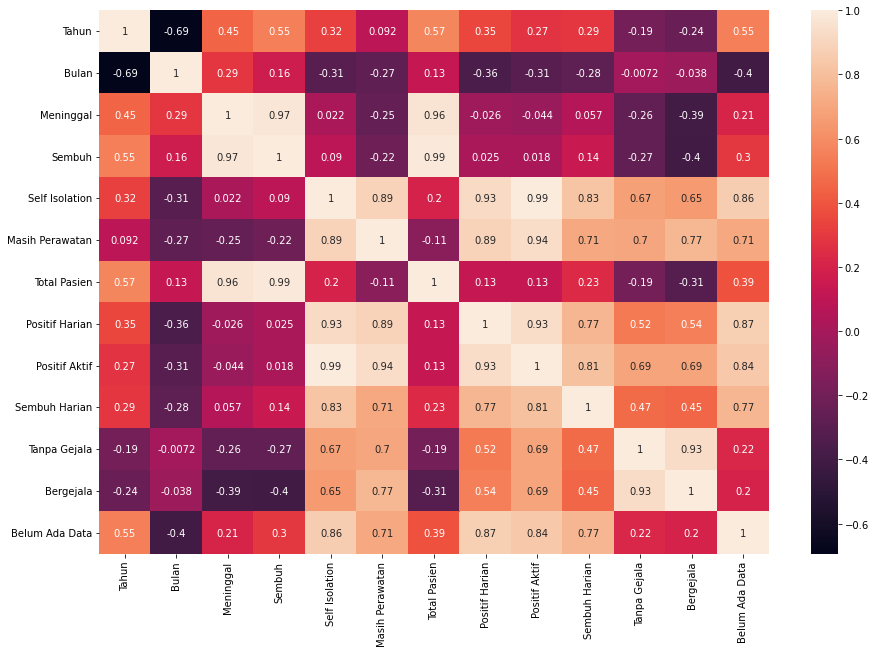

In [14]:
# korelasi antar variabel menggunakan heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2g')

#### __3.2 Trends in Development of Total Patients and Total Cure__

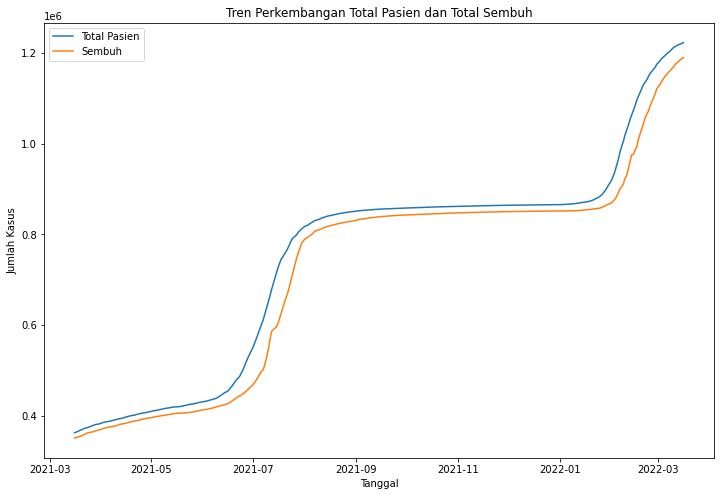

In [15]:
plt.figure(figsize=(12,8))

sns.lineplot(x=df['Tanggal'], y=df['Total Pasien'], palette=('red',), label='Total Pasien')
sns.lineplot(x=df['Tanggal'], y=df['Sembuh'], palette=('red',), label='Sembuh')

plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus')
plt.title('Tren Perkembangan Total Pasien dan Total Sembuh')

plt.legend()
plt.show()

The above visualisation shows that the ratio of 'total pasien' and 'total sembuh' is almost the same. However, if we look at the time gap where 'total patients' and 'total cured' have a far and almost identical gap.

#### __3.3 Trends in Development of Daily Positive and Daily Cure__

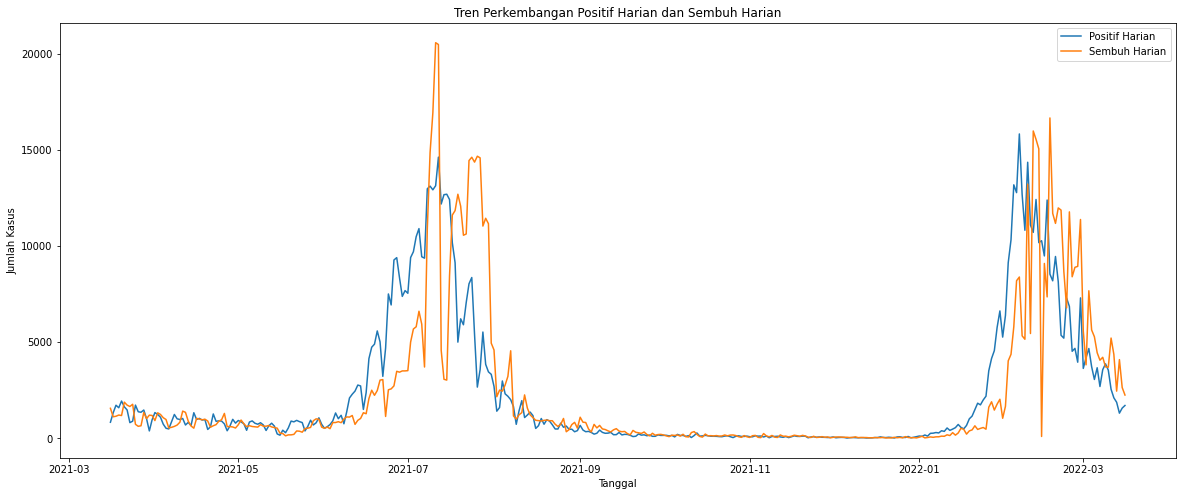

In [ ]:
plt.figure(figsize=(20,8))

sns.lineplot(x=df['Tanggal'], y=df['Positif Harian'], palette=('red',), label='Positif Harian')
sns.lineplot(x=df['Tanggal'], y=df['Sembuh Harian'], palette=('red',), label='Sembuh Harian')

plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus')
plt.title('Tren Perkembangan Positif Harian dan Sembuh Harian')

plt.legend()
plt.show()

From the visualization above, we can see the progress of increasing positive cases and recovering cases every day. This visualization can compare the trend of increasing positive cases and cured cases having a large distance gap comparison on several dates. A very striking difference occurs in June to August 2021 and February to March 2022

#### __3.4 Comparison of Average Daily Positive Cases and Daily Cure__

In [18]:
dataset_2021 = df[df['Tahun'] == 2021]
dataset_2022 = df[df['Tahun'] == 2022]

In [19]:
dataset_2021 = dataset_2021[['Bulan', 'Positif Harian', 'Sembuh Harian']]
dataset_2021 = dataset_2021.groupby(['Bulan'], as_index = False)['Positif Harian', 'Sembuh Harian'].mean()
dataset_2021['Positif Harian'] = round(dataset_2021['Positif Harian'], 1)
dataset_2021['Sembuh Harian'] = round(dataset_2021['Sembuh Harian'], 1)

dataset_2021

,Bulan,Positif Harian,Sembuh Harian
0,3,1282.5,1250.3
1,4,885.5,864.4
2,5,691.6,552.7
3,6,3780.3,1762.3
4,7,8747.9,10313.7
5,8,1159.0,1468.7
6,9,239.4,411.5
7,10,121.8,144.5
8,11,80.2,96.9
9,12,43.5,41.7


In [20]:
dataset_2022 = dataset_2022[['Bulan', 'Positif Harian', 'Sembuh Harian']]
dataset_2022 = dataset_2022.groupby(['Bulan'], as_index = False)['Positif Harian', 'Sembuh Harian'].mean()
dataset_2022['Positif Harian'] = round(dataset_2022['Positif Harian'], 1)
dataset_2022['Sembuh Harian'] = round(dataset_2022['Sembuh Harian'], 1)

dataset_2022

,Bulan,Positif Harian,Sembuh Harian
0,1,1550.3,525.7
1,2,9338.7,9032.6
2,3,2984.1,4320.2


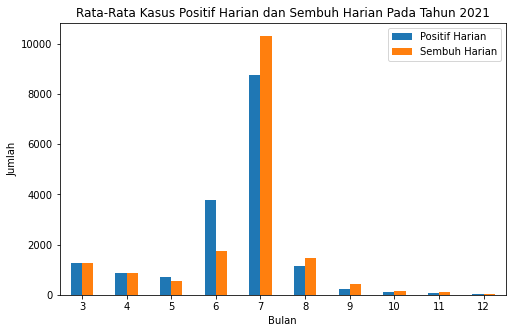

In [25]:
dataset_2021.plot(x='Bulan', y=['Positif Harian', 'Sembuh Harian'], kind='bar', rot=0, figsize=(8,5))
plt.title('Rata-Rata Kasus Positif Harian dan Sembuh Harian Pada Tahun 2021')
plt.xlabel('Bulan')
plt.ylabel('Jumlah');

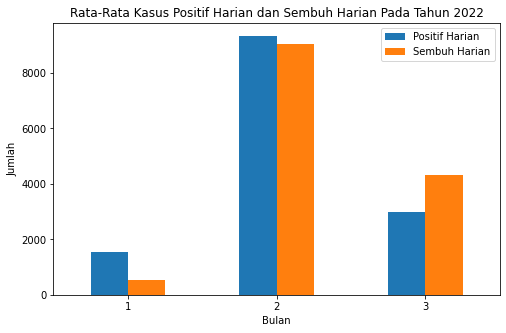

In [26]:
dataset_2022.plot(x='Bulan', y=['Positif Harian', 'Sembuh Harian'], kind='bar', rot=0, figsize=(8,5))
plt.title('Rata-Rata Kasus Positif Harian dan Sembuh Harian Pada Tahun 2022')
plt.xlabel('Bulan')
plt.ylabel('Jumlah');

We calculate the average of 'positive cases' and 'cured cases' from the visualization above. This is done to assess the performance of Jakarta's recovery against covid. The visualization explains that at the beginning of the year, 'positive cases' had a higher average than 'cured cases' until June 2021. From July to December, it showed 'cured cases' have a higher average, and then in early 2022, the average 'positive cases' is higher than the 'cured cases'

#### __3.5 Daily Cure Percentage__


In [27]:
persentase_sembuh_2021 = df[df['Tahun'] == 2021]
persentase_sembuh_2022 = df[df['Tahun'] == 2022]

In [44]:
persentase_sembuh_2021 = persentase_sembuh_2021[['Bulan', 'Sembuh Harian', 'Positif Aktif']]
persentase_sembuh_2021['Persentase Sembuh'] = round(persentase_sembuh_2021['Sembuh Harian']/persentase_sembuh_2021['Positif Aktif']*100,2)
persentase_sembuh_2021 = persentase_sembuh_2021.groupby(['Bulan'], as_index = False)['Positif Aktif', 'Sembuh Harian', 'Persentase Sembuh'].mean()
persentase_sembuh_2021

,Bulan,Positif Aktif,Sembuh Harian,Persentase Sembuh
0,3,6790.312500,1250.312500,18.41
1,4,6732.966667,864.400000,12.84
2,5,8441.483871,552.741935,6.55
3,6,27204.466667,1762.300000,6.48
4,7,80371.322581,10313.709677,12.83
5,8,9992.516129,1468.677419,14.70
6,9,3508.600000,411.466667,11.73
7,10,1340.838710,144.516129,10.78
8,11,673.166667,96.933333,14.40
9,12,326.774194,41.709677,12.76


In [45]:
persentase_sembuh_2022 = persentase_sembuh_2022[['Bulan', 'Sembuh Harian', 'Positif Aktif']]
persentase_sembuh_2022['Persentase Sembuh'] = round(persentase_sembuh_2022['Sembuh Harian']/persentase_sembuh_2022['Positif Aktif']*100,2)
persentase_sembuh_2022 = persentase_sembuh_2022.groupby(['Bulan'], as_index = False)['Positif Aktif', 'Sembuh Harian', 'Persentase Sembuh'].mean()
persentase_sembuh_2022

,Bulan,Positif Aktif,Sembuh Harian,Persentase Sembuh
0,1,7383.483871,525.709677,7.12
1,2,66367.464286,9032.642857,13.61
2,3,27838.625000,4320.187500,15.52


Text(0, 0.5, 'Persentase')

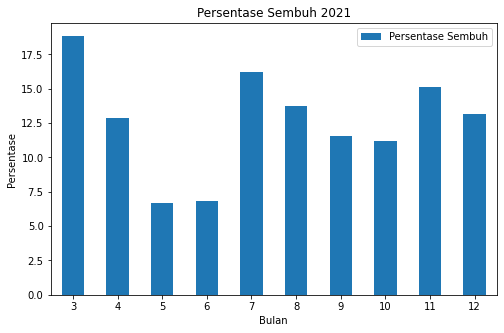

In [30]:
persentase_sembuh_2021.plot(x='Bulan', y= 'Persentase Sembuh', kind='bar', rot=0, figsize=(8,5))
plt.title('Persentase Sembuh 2021')
plt.xlabel('Bulan')
plt.ylabel('Persentase')

Text(0, 0.5, 'Persentase')

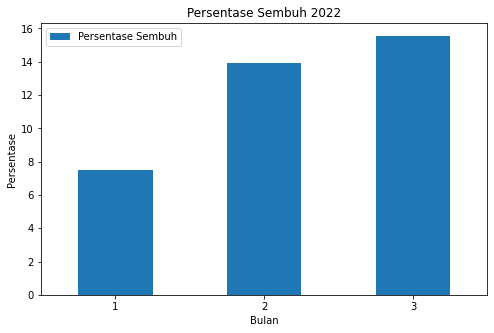

In [31]:
persentase_sembuh_2022.plot(x='Bulan', y= 'Persentase Sembuh', kind='bar', rot=0, figsize=(8,5))
plt.title('Persentase Sembuh 2022')
plt.xlabel('Bulan')
plt.ylabel('Persentase')

From the visualization above, we can see that the average percentage of recovering in Jakarta is approximately 18%, the highest and 6%, the lowest. The average percentage cure rate in 2022 has a good increase.

#### __3.6 Comparison of Average Self Isolation and Still Treatment__

In [33]:
mean_simp_2021 = df[df['Tahun'] == 2021]
mean_simp_2022 = df[df['Tahun'] == 2022]

In [34]:
mean_simp_2021 = mean_simp_2021[['Bulan', 'Self Isolation', 'Masih Perawatan']]
mean_simp_2021 = mean_simp_2021.groupby(['Bulan'], as_index = False)['Self Isolation', 'Masih Perawatan'].mean()
mean_simp_2021['Self Isolation'] = round(mean_simp_2021['Self Isolation'], 1)
mean_simp_2021['Masih Perawatan'] = round(mean_simp_2021['Masih Perawatan'], 1)

In [35]:
mean_simp_2022 = mean_simp_2022[['Bulan', 'Self Isolation', 'Masih Perawatan']]
mean_simp_2022 = mean_simp_2022.groupby(['Bulan'], as_index = False)['Self Isolation', 'Masih Perawatan'].mean()
mean_simp_2022['Self Isolation'] = round(mean_simp_2022['Self Isolation'], 1)
mean_simp_2022['Masih Perawatan'] = round(mean_simp_2022['Masih Perawatan'], 1)
mean_simp_2022

,Bulan,Self Isolation,Masih Perawatan
0,1,5749.0,1634.5
1,2,53750.9,12616.5
2,3,23605.3,4233.3


Text(0, 0.5, 'Jumlah')

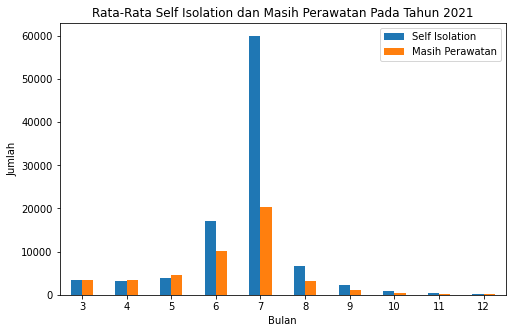

In [36]:
mean_simp_2021.plot(x='Bulan', y=['Self Isolation', 'Masih Perawatan'], kind='bar', rot=0, figsize=(8,5))
plt.title('Rata-Rata Self Isolation dan Masih Perawatan Pada Tahun 2021')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')

Text(0, 0.5, 'Jumlah')

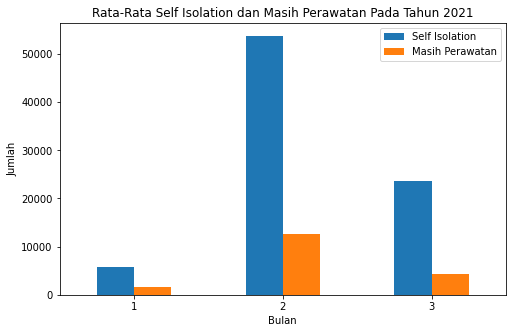

In [37]:
mean_simp_2022.plot(x='Bulan', y=['Self Isolation', 'Masih Perawatan'], kind='bar', rot=0, figsize=(8,5))
plt.title('Rata-Rata Self Isolation dan Masih Perawatan Pada Tahun 2021')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')

From the visualization above, we can compare the differences between patients who are self-isolating and those who are treated in health facilities. At the beginning of 2021, the ratio is almost the same between patients who are self-isolating and those being treated in health facilities. From June 2021 to March 2022, there was a significant difference between patients who were self-isolating and treated in health facilities.

#### __3.7 Self-Isolation Percentage and Still Treatment Percentage__

In [38]:
percent_simp_2021 = df[df['Tahun'] == 2021]
percent_simp_2022 = df[df['Tahun'] == 2022]

In [39]:
percent_simp_2021 = percent_simp_2021[['Bulan', 'Self Isolation', 'Masih Perawatan', 'Positif Aktif']]
percent_simp_2021['Persentase Self Isolation'] = round(percent_simp_2021['Self Isolation']/percent_simp_2021['Positif Aktif']*100,2)
percent_simp_2021['Persentase Masih Perawatan'] = round(percent_simp_2021['Masih Perawatan']/percent_simp_2021['Positif Aktif']*100,2)
percent_simp_2021 = percent_simp_2021.groupby(['Bulan'], as_index = False)['Positif Aktif', 'Persentase Self Isolation', 'Persentase Masih Perawatan'].mean()
percent_simp_2021

,Bulan,Positif Aktif,Persentase Self Isolation,Persentase Masih Perawatan
0,3,6790.312500,50.733125,49.266875
1,4,6732.966667,49.003000,50.997000
2,5,8441.483871,46.922903,53.077097
3,6,27204.466667,58.722333,41.277667
4,7,80371.322581,72.881290,27.118710
5,8,9992.516129,67.653548,32.346452
6,9,3508.600000,67.347333,32.652667
7,10,1340.838710,73.308710,26.691290
8,11,673.166667,67.849667,32.150333
9,12,326.774194,52.951935,47.048065


In [40]:
percent_simp_2022 = percent_simp_2022[['Bulan', 'Self Isolation', 'Masih Perawatan', 'Positif Aktif']]
percent_simp_2022['Persentase Self Isolation'] = round(percent_simp_2022['Self Isolation']/percent_simp_2022['Positif Aktif']*100,2)
percent_simp_2022['Persentase Masih Perawatan'] = round(percent_simp_2022['Masih Perawatan']/percent_simp_2022['Positif Aktif']*100,2)
percent_simp_2022 = percent_simp_2022.groupby(['Bulan'], as_index = False)['Positif Aktif', 'Persentase Self Isolation', 'Persentase Masih Perawatan'].mean()
percent_simp_2022

,Bulan,Positif Aktif,Persentase Self Isolation,Persentase Masih Perawatan
0,1,7383.483871,79.073226,20.926774
1,2,66367.464286,81.546429,18.453571
2,3,27838.625000,84.547500,15.452500


Text(0, 0.5, 'Persentase')

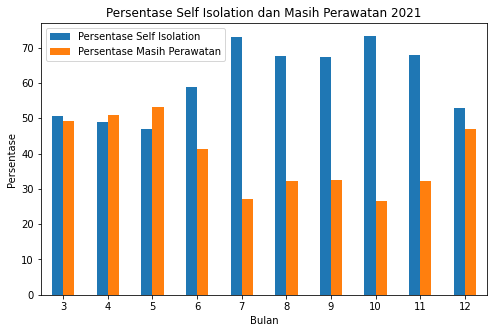

In [41]:
percent_simp_2021.plot(x='Bulan', y= ['Persentase Self Isolation', 'Persentase Masih Perawatan'], kind='bar', rot=0, figsize=(8,5))
plt.title('Persentase Self Isolation dan Masih Perawatan 2021')
plt.xlabel('Bulan')
plt.ylabel('Persentase')

Text(0, 0.5, 'Persentase')

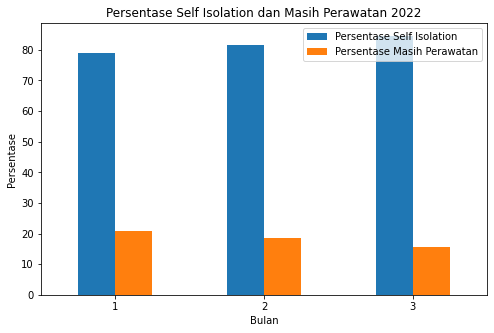

In [42]:
percent_simp_2022.plot(x='Bulan', y= ['Persentase Self Isolation', 'Persentase Masih Perawatan'], kind='bar', rot=0, figsize=(8,5))
plt.title('Persentase Self Isolation dan Masih Perawatan 2022')
plt.xlabel('Bulan')
plt.ylabel('Persentase')

From the visualization above, we can see that the highest average percentage of self-isolation is 84%, and the lowest is 46%. Meanwhile, for treatment in health facilities, the highest was 53%, and the lowest was 15%. In this visualization, there is an increase in patients who are self-isolating rather than being treated in health facilities. This can be seen from March 2021 for 50% self-isolation while being treated in health facilities is 49% and in March 2022 for self-isolation 84% and being treated in health facilities 15%.

#### __3.8 Timeline for the Progress of Positive and Recovered Cases based on Important Dates__

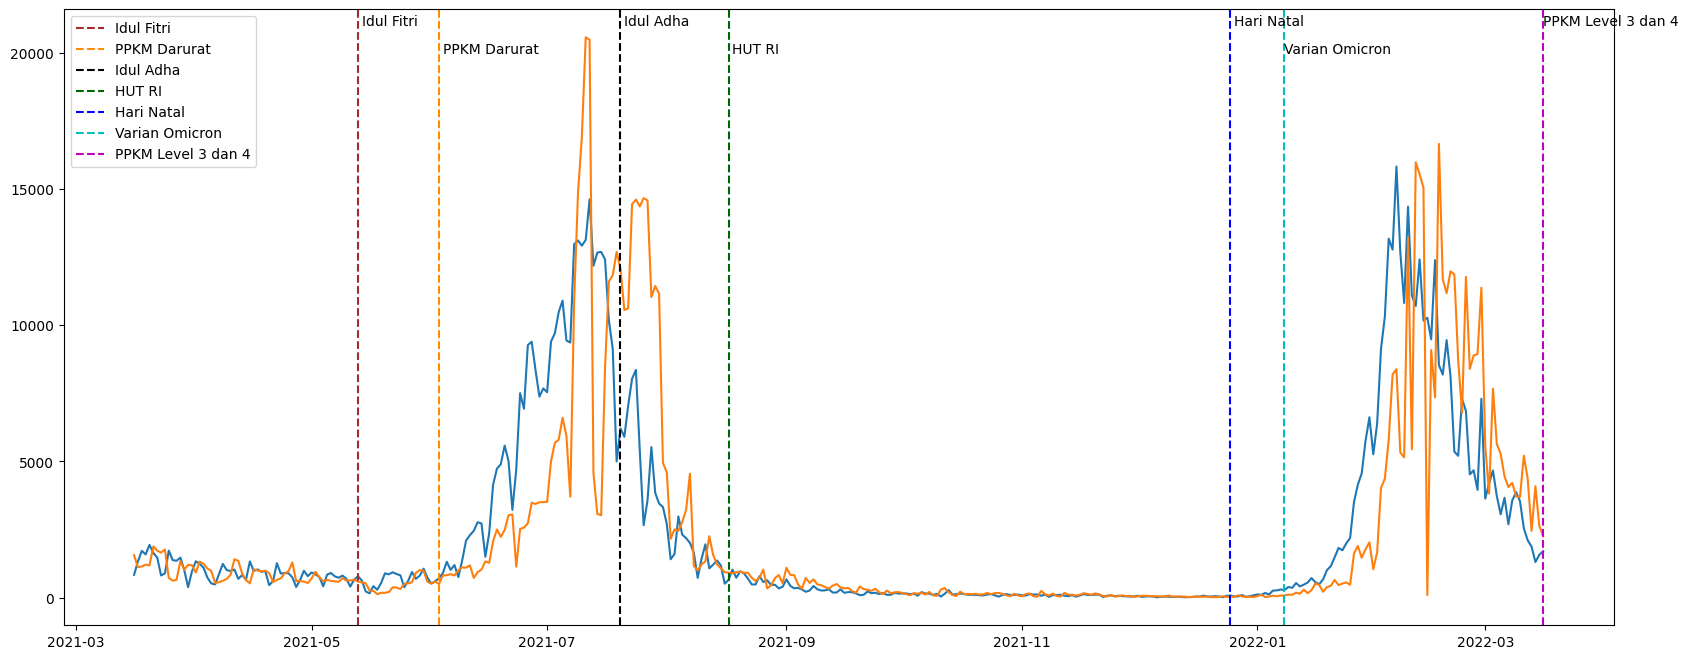

In [43]:
import datetime as dt

plt.style.use('default')
plt.figure(figsize=(20,8))
plt.plot(df['Tanggal'], df['Positif Harian'])
plt.plot(df['Tanggal'], df['Sembuh Harian'])

plt.axvline(x = dt.datetime(2021, 5, 13), linestyle='--', color='brown', label='Idul Fitri')
plt.axvline(x = dt.datetime(2021, 6, 3), linestyle='--', color='darkorange', label='PPKM Darurat')
plt.axvline(x = dt.datetime(2021, 7, 20), linestyle='--', color='k', label='Idul Adha')
plt.axvline(x = dt.datetime(2021, 8, 17), linestyle='--', color='darkgreen', label='HUT RI')
plt.axvline(x = dt.datetime(2021, 12, 25), linestyle='--', color='blue', label='Hari Natal')
plt.axvline(x = dt.datetime(2022, 1, 8), linestyle='--', color='c', label='Varian Omicron')
plt.axvline(x = dt.datetime(2022, 3, 16), linestyle='--', color='m', label='PPKM Level 3 dan 4')

plt.annotate('Idul Fitri', (dt.datetime(2021, 5, 14), 21000), size=10)
plt.annotate('PPKM Darurat', (dt.datetime(2021, 6, 4), 20000), size=10)
plt.annotate('Idul Adha', (dt.datetime(2021, 7, 21), 21000), size=10)
plt.annotate('HUT RI', (dt.datetime(2021, 8, 18), 20000), size=10)
plt.annotate('Hari Natal', (dt.datetime(2021, 12, 26), 21000), size=10)
plt.annotate('Varian Omicron', (dt.datetime(2022, 1, 8), 20000), size=10)
plt.annotate('PPKM Level 3 dan 4', (dt.datetime(2022, 3, 16), 21000), size=10)

plt.legend()

The following is a timeline of positive and cured cases based on important dates in 2021 and 2022. We include several important dates that may turn the curve up, down, or down. The graph above is a number of important dates that occur from 2021 to 2022. Here is an explanation of each legend in the graph above:
- Emergency PPKM: the government enforces Emergency PPKM to suppress positive cases after an increase in positive cases nationally. As seen from the graph above, after the Emergency PPKM, there was a significant increase in positive cases from before.
- PPKM Level 3 and Level 4: comes into effect on July 20, 2021. PPKM Level 3 and Level 4 can be said to be effective because there has been a significant decrease in positive cases and an increase in recovered patients.
- Eid Al-Fitr: Eid Al-Fitr falls on May 13, 2021.
- Eid al-Adha: Eid al-Adha fell on July 20, 2021.
- RI HUT: RI HUT on August 17, 2021
- Christmas Day: Christmas Day on December 26, 2021
- New Covid-19 variant (Omicron): this variant was detected in Indonesia on January 8, 2022. This led to a significant increase in positive cases in Jakarta